In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#1. Data Preparation and Preprocessing

In [56]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
# Print the summary information of the DataFrame
print("\nSummary information of the DataFrame:")
print(df.info())
print(df.shape)


Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
(20640, 10)


In [58]:
#Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
                    Missing Values  Percentage
longitude                        0    0.000000
latitude                         0    0.000000
housing_median_age               0    0.000000
total_rooms                      0    0.000000
total_bedrooms                 207    1.002907
population                       0    0.000000
households                       0    0.000000
median_income                    0    0.000000
median_house_value               0    0.000000
ocean_proximity                  0    0.000000


In [59]:
#Filling the missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
#Missing values after filling
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
                    Missing Values  Percentage
longitude                        0         0.0
latitude                         0         0.0
housing_median_age               0         0.0
total_rooms                      0         0.0
total_bedrooms                   0         0.0
population                       0         0.0
households                       0         0.0
median_income                    0         0.0
median_house_value               0         0.0
ocean_proximity                  0         0.0


In [60]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [61]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [62]:
#Defining data
y = df['median_house_value']
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4258)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

#2.  Data Visualization

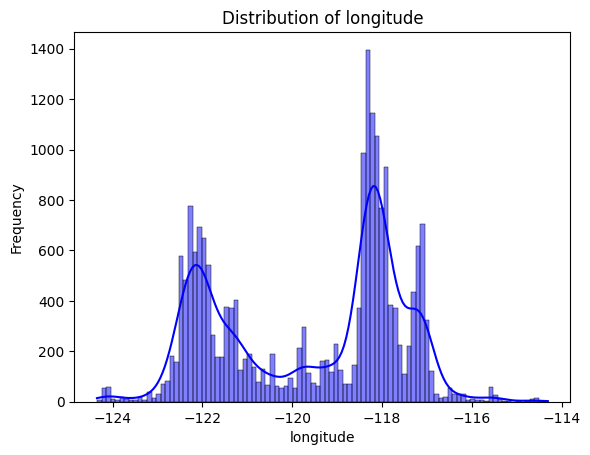

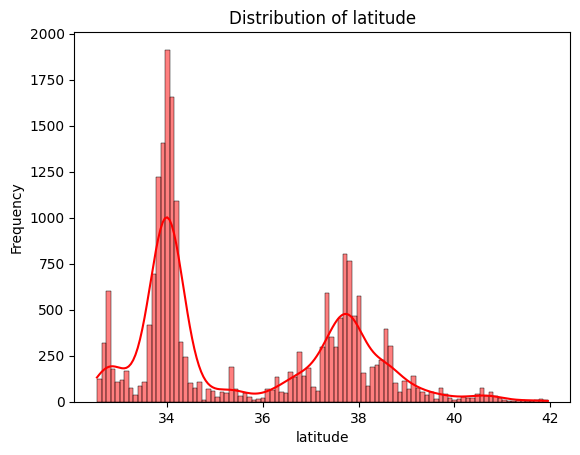

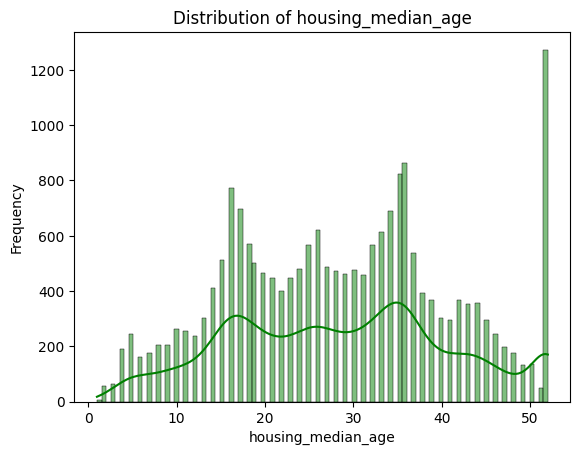

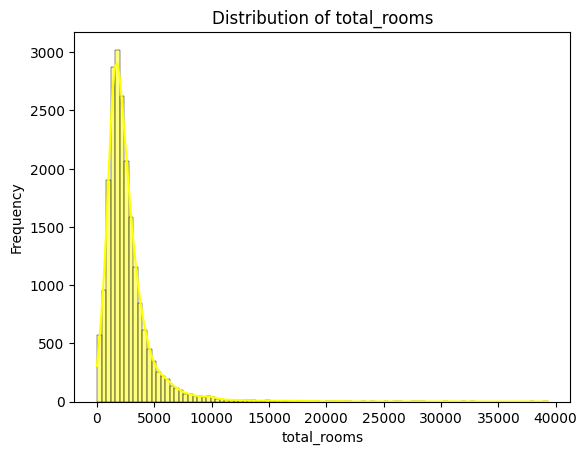

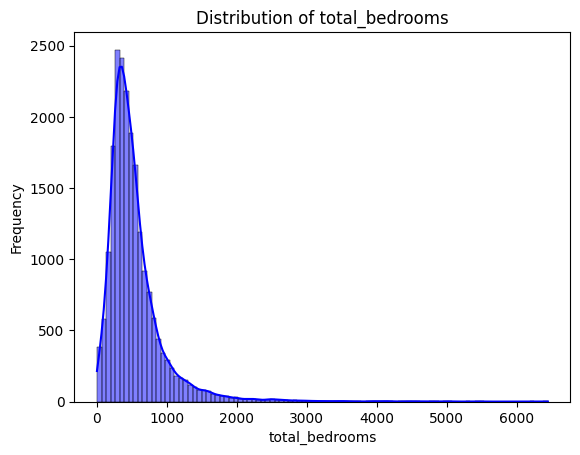

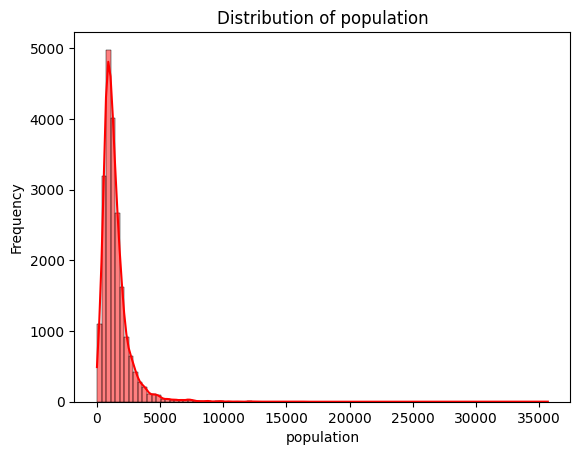

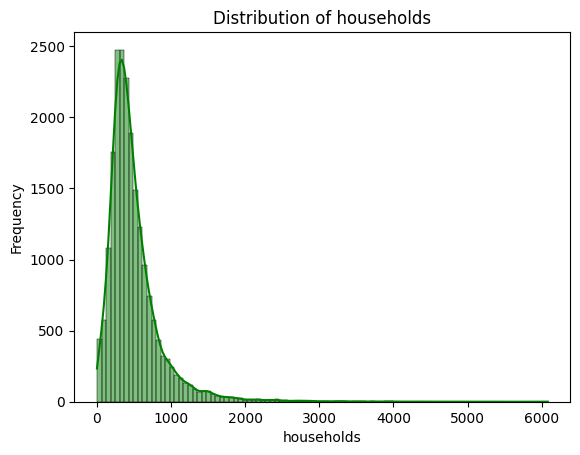

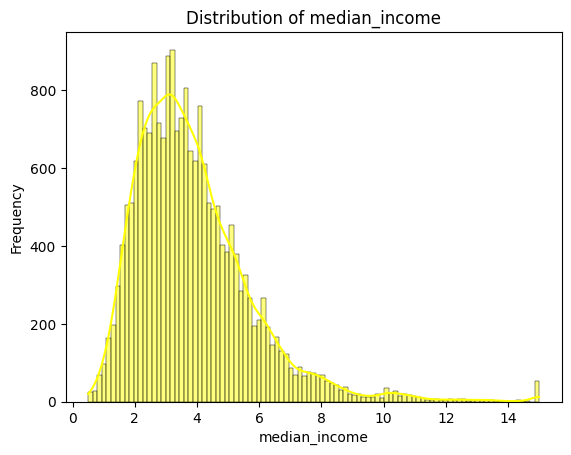

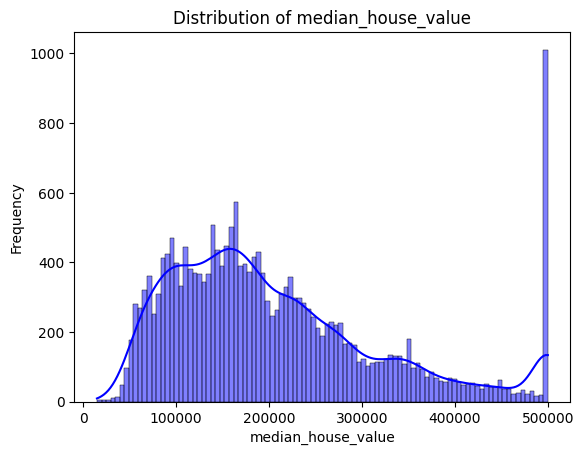

Text(0, 0.5, 'Frequency')

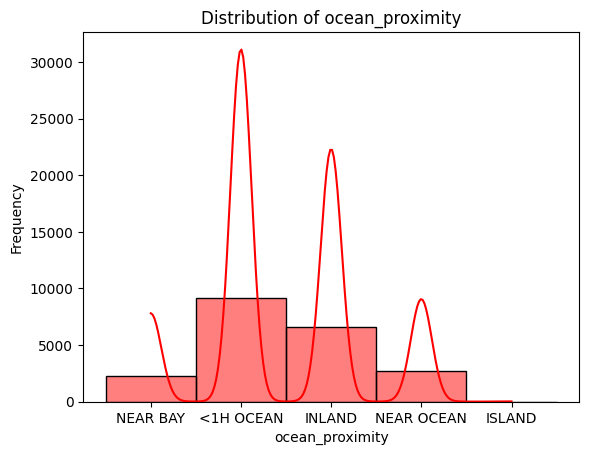

In [63]:
#plt.figure(figsize=(10, 6))
sns.histplot(df['longitude'], kde=True, bins=99, color='blue')
plt.title("Distribution of longitude")
plt.xlabel("longitude")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['latitude'], kde=True, bins=99, color='red')
plt.title("Distribution of latitude")
plt.xlabel("latitude")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['housing_median_age'], kde=True, bins=99, color='green')
plt.title("Distribution of housing_median_age")
plt.xlabel("housing_median_age")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['total_rooms'], kde=True, bins=99, color='yellow')
plt.title("Distribution of total_rooms")
plt.xlabel("total_rooms")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['total_bedrooms'], kde=True, bins=99, color='blue')
plt.title("Distribution of total_bedrooms")
plt.xlabel("total_bedrooms")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['population'], kde=True, bins=99, color='red')
plt.title("Distribution of population")
plt.xlabel("population")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['households'], kde=True, bins=99, color='green')
plt.title("Distribution of households")
plt.xlabel("households")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['median_income'], kde=True, bins=99, color='yellow')
plt.title("Distribution of median_income")
plt.xlabel("median_income")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['median_house_value'], kde=True, bins=99, color='blue')
plt.title("Distribution of median_house_value")
plt.xlabel("median_house_value")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['ocean_proximity'], kde=True, bins=99, color='red')
plt.title("Distribution of ocean_proximity")
plt.xlabel("ocean_proximity")
plt.ylabel("Frequency")

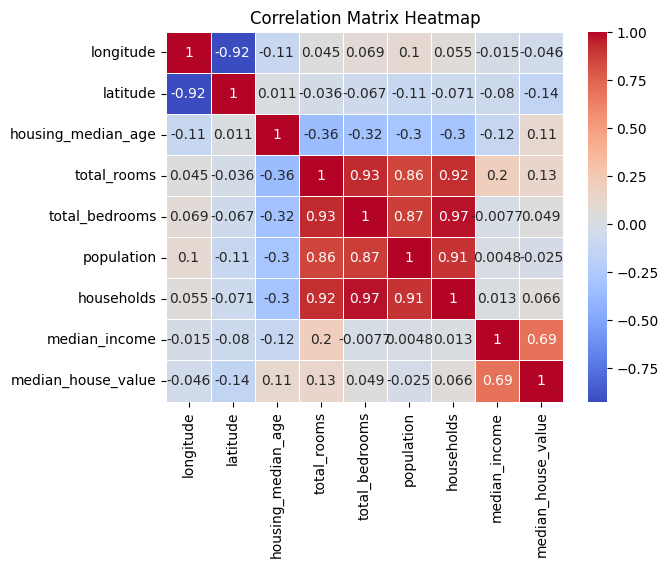

In [64]:
#Correlation is possible for only numerical values
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#3. Model Implementation

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}
#Defining all the models

In [66]:
results = {}
#Model fitting
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
#Stored the models fitted into results

#4. Performance evaluation

In [67]:
# Display Results
for model_name, metrics in results.items():
    print(f"{model_name}: MAE={metrics['MAE']}, MSE={metrics['MSE']}, RMSE={metrics['RMSE']}, R2={metrics['R2']}, Accuracy={(metrics['R2']) * 100}")

Linear Regression: MAE=51274.020683706876, MSE=5087260664.731913, RMSE=71325.0353293422, R2=0.6340598683559396, Accuracy=63.405986835593964
Ridge Regression: MAE=51273.82363989486, MSE=5087248261.400829, RMSE=71324.94837993807, R2=0.6340607605603908, Accuracy=63.40607605603908
Lasso Regression: MAE=51273.94579323271, MSE=5087256137.525349, RMSE=71325.00359288703, R2=0.6340601940098967, Accuracy=63.40601940098966
Decision Tree: MAE=42681.3679748062, MSE=4588312682.070495, RMSE=67737.08498356343, R2=0.6699505180575467, Accuracy=66.99505180575467
Random Forest: MAE=31950.483345445737, MSE=2441260717.2697353, RMSE=49409.115730497906, R2=0.8243936516859731, Accuracy=82.4393651685973
Support Vector Regression: MAE=90608.21427373163, MSE=14871987817.907425, RMSE=121950.75980865156, R2=-0.06978146758294712, Accuracy=-6.978146758294712


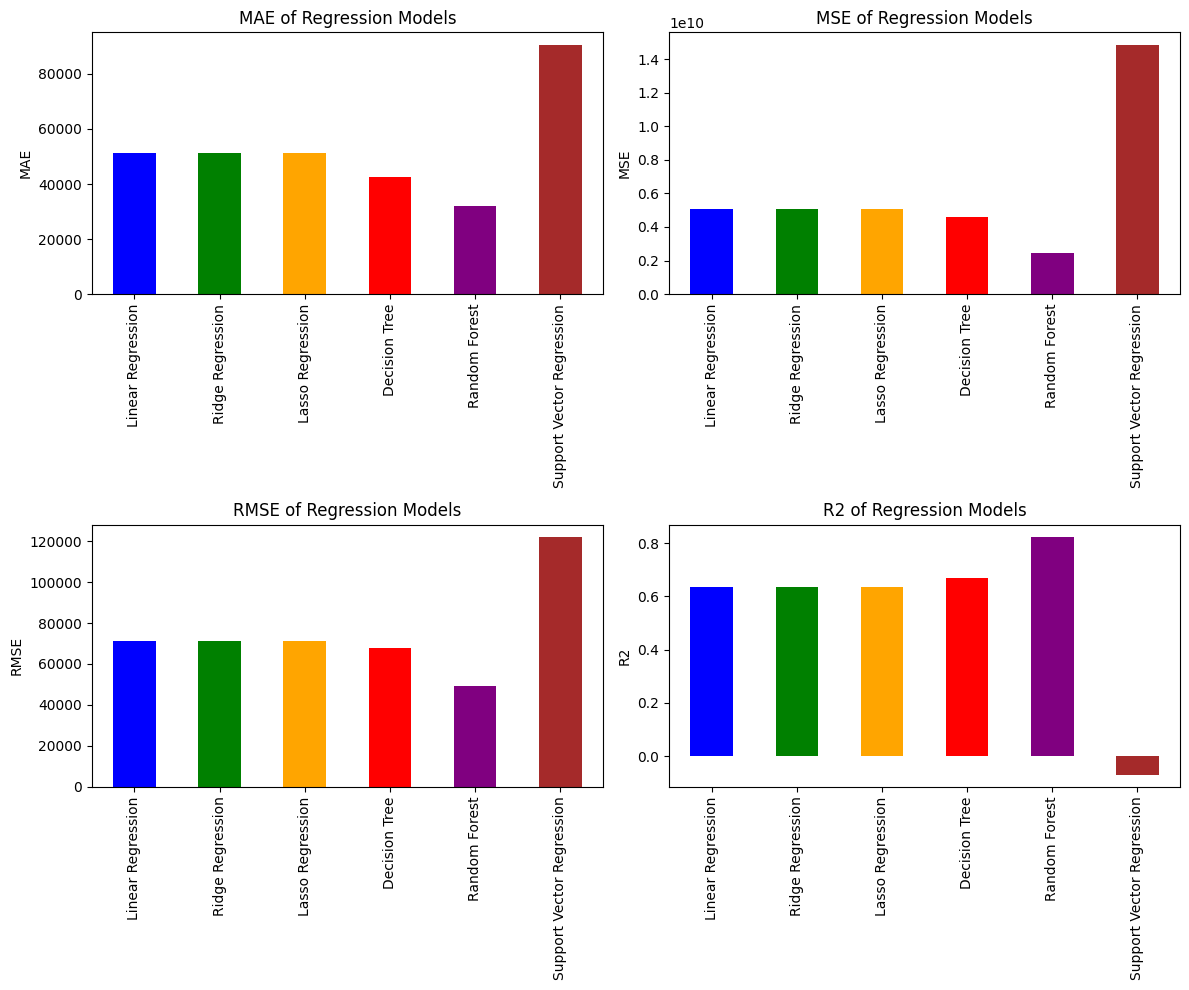

In [68]:
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R2'])
# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot each metric separately
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for i, ax in enumerate(axs.flat):
    results_df.iloc[i].plot(kind='bar', ax=ax, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
    ax.set_title(f'{metrics[i]} of Regression Models')
    ax.set_ylabel(metrics[i])
plt.tight_layout()
plt.show()

#5. Discussion and Conclusion

# Discussion of Model Performance

1. **Linear Regression, Ridge Regression, and Lasso Regression**: These models performed similarly across all metrics (MAE, MSE, RMSE, and R²). They generally had moderate error rates and R² scores, indicating a reasonable fit but with some variance unexplained by the models. Ridge and Lasso regressions, which add regularization terms, slightly outperformed Linear Regression in some cases due to their ability to handle multicollinearity.

2. **Decision Tree Regression**: This model had higher error rates (MAE, MSE, and RMSE) than the linear models, suggesting it may have overfitted the training data, especially in a dataset with many features and potential noise.

3. **Random Forest Regression**: This ensemble model achieved the lowest error rates and highest R², indicating strong predictive performance. Its ability to average multiple trees mitigates overfitting and improves generalization.

4. **Support Vector Regression (SVR)**: This model exhibited the highest error rates and lowest R², suggesting it did not capture the patterns effectively in the data. SVR can be sensitive to parameter tuning and may require more careful preprocessing or feature selection.

# Best Model

- **Random Forest Regression** performed the best, achieving the lowest MAE, MSE, and RMSE and the highest R². Its ability to reduce variance and avoid overfitting, through averaging multiple decision trees, makes it ideal for complex datasets with nonlinear relationships and high dimensionality, as is the case with the California Housing Dataset.

# Recommendations for Improvement

1. **Hyperparameter Tuning**: Fine-tune hyperparameters for all models, especially SVR and Random Forest, using techniques like grid search or randomized search to find the optimal settings.
   
2. **Feature Engineering**: Create new features or apply dimensionality reduction techniques (e.g., PCA) to improve model performance, particularly for models sensitive to multicollinearity (like Linear, Ridge, and Lasso Regression).

3. **Data Augmentation or Collection**: Increasing the dataset size or diversity may help models like Decision Trees and SVR learn more effectively.

4. **Further Analysis**: Investigate feature importance or partial dependence plots to understand which factors most influence predictions, potentially guiding domain-specific feature engineering or data collection strategies.